In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from tensorflow import keras

from functions.plotting import plot_histograms
from functions.testing import group_models

WIDTH = 150
HEIGHT = 150

In [3]:
data_dir = os.path.join(
    '..',
    '..',
    '..',
    'data2',
    'images_original_inception_resnet_v2_150x150_categorized_no_test')
test_data_dir = os.path.join(data_dir, 'validation')
test_ds = keras.utils.image_dataset_from_directory(
    directory=test_data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(HEIGHT, WIDTH))

In [5]:
models_dir = os.path.join(
    '..',
    '..',
    'models')
model_names = os.listdir(models_dir)
model_groups = group_models(model_names)

In [ ]:
model_numbers = {}

for group in model_groups:
    model_numbers[group] = {'accuracies': [], 'losses': []}

    for name in group:
        model_path = os.path.join(models_dir, name)
        model = keras.models.load_model(model_path)
        loss, accuracy = model.predict(test_ds)

        model_numbers[group]['accuracies'].append(accuracy)
        model_numbers[group]['loss'].append(loss)

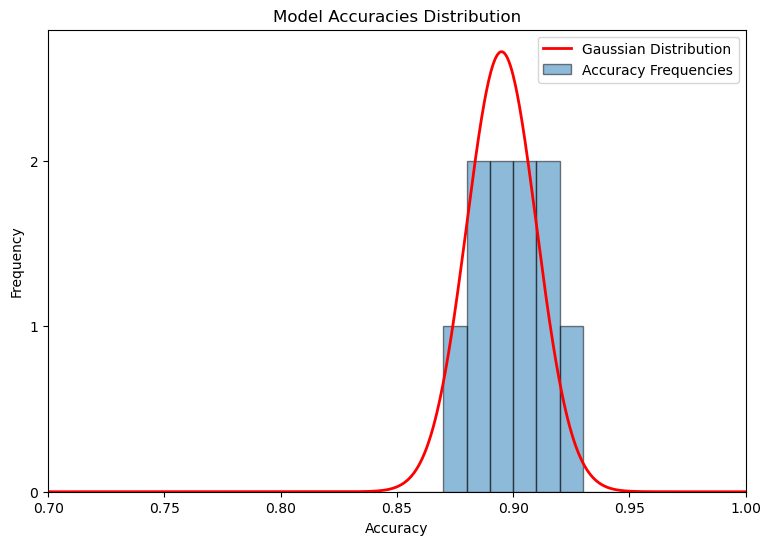

In [17]:
for model_name, vals in model_numbers:
    accuracies = vals['accuracies']
    losses = vals['losses']

    plot_histograms(accuracies, f'{model_name} accuracies dist.', 'Accuracy')
    plot_histograms(losses, f'{model_name} losses dist.', 'Loss')